In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DAL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


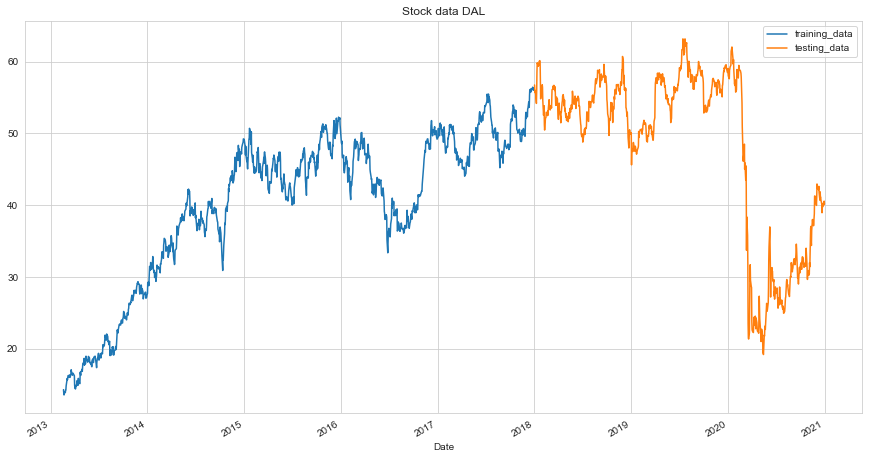

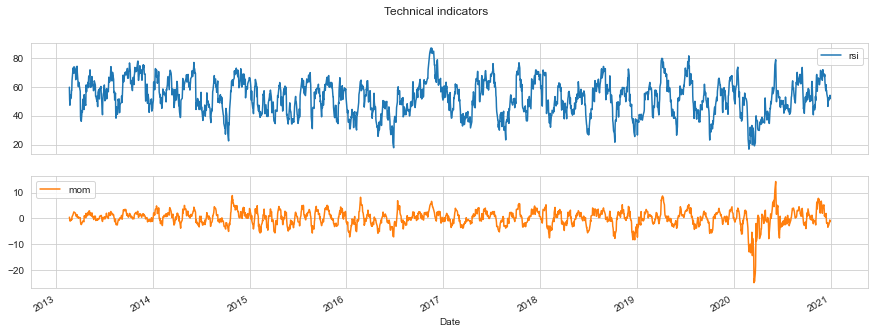

In [2]:
stock_name = 'dal'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1748.18, duration: 0:00:00.276062
episode: 2/2000, episode end value: 1760.15, duration: 0:00:00.305068
episode: 3/2000, episode end value: 1790.23, duration: 0:00:00.262224
episode: 4/2000, episode end value: 1804.86, duration: 0:00:00.255988
episode: 5/2000, episode end value: 1900.46, duration: 0:00:00.269191
episode: 6/2000, episode end value: 1786.79, duration: 0:00:00.240915
episode: 7/2000, episode end value: 1823.68, duration: 0:00:00.251055
episode: 8/2000, episode end value: 1847.52, duration: 0:00:00.252058
episode: 9/2000, episode end value: 1788.52, duration: 0:00:00.262059
episode: 10/2000, episode end value: 1866.31, duration: 0:00:00.242722
episode: 11/2000, episode end value: 1782.74, duration: 0:00:00.253057
episode: 12/2000, episode end value: 1777.48, duration: 0:00:00.257019
episode: 13/2000, episode end value: 1800.92, duration: 0:00:00.231344
episode: 14/2000, episode end value: 1780.60, duration: 0:00:00.259851
episode: 15/200

episode: 117/2000, episode end value: 1805.72, duration: 0:00:00.287065
episode: 118/2000, episode end value: 1783.13, duration: 0:00:00.272104
episode: 119/2000, episode end value: 1784.16, duration: 0:00:00.268625
episode: 120/2000, episode end value: 1783.59, duration: 0:00:00.323187
episode: 121/2000, episode end value: 1777.90, duration: 0:00:00.331076
episode: 122/2000, episode end value: 1777.61, duration: 0:00:00.320917
episode: 123/2000, episode end value: 1782.02, duration: 0:00:00.332597
episode: 124/2000, episode end value: 1798.29, duration: 0:00:00.328951
episode: 125/2000, episode end value: 1779.21, duration: 0:00:00.296610
episode: 126/2000, episode end value: 1805.77, duration: 0:00:00.307577
episode: 127/2000, episode end value: 1768.97, duration: 0:00:00.275407
episode: 128/2000, episode end value: 1775.95, duration: 0:00:00.301451
episode: 129/2000, episode end value: 1803.62, duration: 0:00:00.302096
episode: 130/2000, episode end value: 1785.26, duration: 0:00:00

episode: 231/2000, episode end value: 1786.24, duration: 0:00:00.402237
episode: 232/2000, episode end value: 1795.92, duration: 0:00:00.365441
episode: 233/2000, episode end value: 1728.14, duration: 0:00:00.420617
episode: 234/2000, episode end value: 1793.90, duration: 0:00:00.424772
episode: 235/2000, episode end value: 1777.08, duration: 0:00:00.501634
episode: 236/2000, episode end value: 1796.20, duration: 0:00:00.394061
episode: 237/2000, episode end value: 1722.03, duration: 0:00:00.431308
episode: 238/2000, episode end value: 1793.48, duration: 0:00:00.436142
episode: 239/2000, episode end value: 1774.58, duration: 0:00:00.439986
episode: 240/2000, episode end value: 1794.29, duration: 0:00:00.456017
episode: 241/2000, episode end value: 1777.53, duration: 0:00:00.524627
episode: 242/2000, episode end value: 1789.18, duration: 0:00:00.399365
episode: 243/2000, episode end value: 1771.77, duration: 0:00:00.534341
episode: 244/2000, episode end value: 1784.42, duration: 0:00:00

episode: 345/2000, episode end value: 1785.19, duration: 0:00:00.400183
episode: 346/2000, episode end value: 1791.34, duration: 0:00:00.495090
episode: 347/2000, episode end value: 1794.27, duration: 0:00:00.453859
episode: 348/2000, episode end value: 1788.38, duration: 0:00:00.446385
episode: 349/2000, episode end value: 1785.69, duration: 0:00:00.527719
episode: 350/2000, episode end value: 1797.72, duration: 0:00:00.511524
episode: 351/2000, episode end value: 1730.22, duration: 0:00:00.483224
episode: 352/2000, episode end value: 1786.27, duration: 0:00:00.523148
episode: 353/2000, episode end value: 1804.49, duration: 0:00:00.469241
episode: 354/2000, episode end value: 1780.31, duration: 0:00:00.476904
episode: 355/2000, episode end value: 1795.26, duration: 0:00:00.480392
episode: 356/2000, episode end value: 1790.53, duration: 0:00:00.439789
episode: 357/2000, episode end value: 1782.42, duration: 0:00:00.457457
episode: 358/2000, episode end value: 1799.38, duration: 0:00:00

episode: 459/2000, episode end value: 1767.15, duration: 0:00:00.436316
episode: 460/2000, episode end value: 1772.83, duration: 0:00:00.463662
episode: 461/2000, episode end value: 1755.47, duration: 0:00:00.448105
episode: 462/2000, episode end value: 1805.79, duration: 0:00:00.449716
episode: 463/2000, episode end value: 1777.78, duration: 0:00:00.471340
episode: 464/2000, episode end value: 1808.43, duration: 0:00:00.451850
episode: 465/2000, episode end value: 1772.36, duration: 0:00:00.448606
episode: 466/2000, episode end value: 1780.79, duration: 0:00:00.399065
episode: 467/2000, episode end value: 1798.97, duration: 0:00:00.462898
episode: 468/2000, episode end value: 1765.77, duration: 0:00:00.541222
episode: 469/2000, episode end value: 1795.33, duration: 0:00:00.481893
episode: 470/2000, episode end value: 1772.19, duration: 0:00:00.481703
episode: 471/2000, episode end value: 1777.21, duration: 0:00:00.424610
episode: 472/2000, episode end value: 1795.40, duration: 0:00:00

episode: 573/2000, episode end value: 1778.83, duration: 0:00:00.555077
episode: 574/2000, episode end value: 1794.39, duration: 0:00:00.486090
episode: 575/2000, episode end value: 1778.44, duration: 0:00:00.534674
episode: 576/2000, episode end value: 1780.05, duration: 0:00:00.474789
episode: 577/2000, episode end value: 1793.06, duration: 0:00:00.476441
episode: 578/2000, episode end value: 1778.97, duration: 0:00:00.424127
episode: 579/2000, episode end value: 1803.14, duration: 0:00:00.482864
episode: 580/2000, episode end value: 1776.35, duration: 0:00:00.467030
episode: 581/2000, episode end value: 1784.31, duration: 0:00:00.449248
episode: 582/2000, episode end value: 1772.77, duration: 0:00:00.463386
episode: 583/2000, episode end value: 1792.58, duration: 0:00:00.492679
episode: 584/2000, episode end value: 1784.78, duration: 0:00:00.430482
episode: 585/2000, episode end value: 1799.85, duration: 0:00:00.445577
episode: 586/2000, episode end value: 1730.24, duration: 0:00:00

episode: 687/2000, episode end value: 1792.49, duration: 0:00:00.475415
episode: 688/2000, episode end value: 1803.19, duration: 0:00:00.494322
episode: 689/2000, episode end value: 1722.58, duration: 0:00:00.467486
episode: 690/2000, episode end value: 1802.96, duration: 0:00:00.413311
episode: 691/2000, episode end value: 1772.93, duration: 0:00:00.481171
episode: 692/2000, episode end value: 1795.13, duration: 0:00:00.496148
episode: 693/2000, episode end value: 1780.83, duration: 0:00:00.456482
episode: 694/2000, episode end value: 1787.64, duration: 0:00:00.573919
episode: 695/2000, episode end value: 1779.48, duration: 0:00:00.486990
episode: 696/2000, episode end value: 1803.51, duration: 0:00:00.477406
episode: 697/2000, episode end value: 1774.46, duration: 0:00:00.437246
episode: 698/2000, episode end value: 1798.45, duration: 0:00:00.428597
episode: 699/2000, episode end value: 1784.89, duration: 0:00:00.484405
episode: 700/2000, episode end value: 1780.03, duration: 0:00:00

episode: 801/2000, episode end value: 1784.63, duration: 0:00:00.516976
episode: 802/2000, episode end value: 1792.69, duration: 0:00:00.427549
episode: 803/2000, episode end value: 1773.63, duration: 0:00:00.499734
episode: 804/2000, episode end value: 1805.63, duration: 0:00:00.406011
episode: 805/2000, episode end value: 1768.12, duration: 0:00:00.429994
episode: 806/2000, episode end value: 1785.57, duration: 0:00:00.509477
episode: 807/2000, episode end value: 1787.87, duration: 0:00:00.485132
episode: 808/2000, episode end value: 1777.03, duration: 0:00:00.408979
episode: 809/2000, episode end value: 1781.03, duration: 0:00:00.525912
episode: 810/2000, episode end value: 1784.30, duration: 0:00:00.406545
episode: 811/2000, episode end value: 1777.41, duration: 0:00:00.434243
episode: 812/2000, episode end value: 1785.18, duration: 0:00:00.443561
episode: 813/2000, episode end value: 1807.32, duration: 0:00:00.452529
episode: 814/2000, episode end value: 1716.11, duration: 0:00:00

episode: 915/2000, episode end value: 1793.87, duration: 0:00:00.419686
episode: 916/2000, episode end value: 1744.10, duration: 0:00:00.464751
episode: 917/2000, episode end value: 1776.94, duration: 0:00:00.427525
episode: 918/2000, episode end value: 1794.58, duration: 0:00:00.420670
episode: 919/2000, episode end value: 1766.67, duration: 0:00:00.444422
episode: 920/2000, episode end value: 1775.82, duration: 0:00:00.474235
episode: 921/2000, episode end value: 1778.59, duration: 0:00:00.394486
episode: 922/2000, episode end value: 1783.51, duration: 0:00:00.383701
episode: 923/2000, episode end value: 1801.47, duration: 0:00:00.445304
episode: 924/2000, episode end value: 1776.65, duration: 0:00:00.454518
episode: 925/2000, episode end value: 1781.69, duration: 0:00:00.449610
episode: 926/2000, episode end value: 1798.18, duration: 0:00:00.435546
episode: 927/2000, episode end value: 1865.94, duration: 0:00:00.451070
episode: 928/2000, episode end value: 1738.09, duration: 0:00:00

episode: 1029/2000, episode end value: 1811.96, duration: 0:00:00.452759
episode: 1030/2000, episode end value: 1718.43, duration: 0:00:00.387520
episode: 1031/2000, episode end value: 1774.38, duration: 0:00:00.524724
episode: 1032/2000, episode end value: 1790.06, duration: 0:00:00.506492
episode: 1033/2000, episode end value: 1794.41, duration: 0:00:00.526288
episode: 1034/2000, episode end value: 1780.07, duration: 0:00:00.499873
episode: 1035/2000, episode end value: 1780.94, duration: 0:00:00.516400
episode: 1036/2000, episode end value: 1782.47, duration: 0:00:00.524627
episode: 1037/2000, episode end value: 1778.80, duration: 0:00:00.546771
episode: 1038/2000, episode end value: 1795.17, duration: 0:00:00.531180
episode: 1039/2000, episode end value: 1775.19, duration: 0:00:00.509260
episode: 1040/2000, episode end value: 1793.22, duration: 0:00:00.482539
episode: 1041/2000, episode end value: 1776.97, duration: 0:00:00.454936
episode: 1042/2000, episode end value: 1731.27, dur

episode: 1142/2000, episode end value: 1794.81, duration: 0:00:00.465462
episode: 1143/2000, episode end value: 1780.85, duration: 0:00:00.507551
episode: 1144/2000, episode end value: 1783.75, duration: 0:00:00.485015
episode: 1145/2000, episode end value: 1785.90, duration: 0:00:00.421220
episode: 1146/2000, episode end value: 1792.48, duration: 0:00:00.505191
episode: 1147/2000, episode end value: 1777.97, duration: 0:00:00.474254
episode: 1148/2000, episode end value: 1807.45, duration: 0:00:00.512092
episode: 1149/2000, episode end value: 1777.82, duration: 0:00:00.452194
episode: 1150/2000, episode end value: 1805.74, duration: 0:00:00.474040
episode: 1151/2000, episode end value: 1776.80, duration: 0:00:00.408571
episode: 1152/2000, episode end value: 1780.10, duration: 0:00:00.418822
episode: 1153/2000, episode end value: 1794.86, duration: 0:00:00.473593
episode: 1154/2000, episode end value: 1777.26, duration: 0:00:00.429838
episode: 1155/2000, episode end value: 1792.57, dur

episode: 1255/2000, episode end value: 1729.64, duration: 0:00:00.420011
episode: 1256/2000, episode end value: 1790.86, duration: 0:00:00.416415
episode: 1257/2000, episode end value: 1789.46, duration: 0:00:00.405523
episode: 1258/2000, episode end value: 1778.46, duration: 0:00:00.367471
episode: 1259/2000, episode end value: 1801.47, duration: 0:00:00.473352
episode: 1260/2000, episode end value: 1765.74, duration: 0:00:00.454425
episode: 1261/2000, episode end value: 1782.54, duration: 0:00:00.435465
episode: 1262/2000, episode end value: 1799.40, duration: 0:00:00.467042
episode: 1263/2000, episode end value: 1776.25, duration: 0:00:00.570097
episode: 1264/2000, episode end value: 1795.60, duration: 0:00:00.405890
episode: 1265/2000, episode end value: 1771.01, duration: 0:00:00.449443
episode: 1266/2000, episode end value: 1782.88, duration: 0:00:00.402794
episode: 1267/2000, episode end value: 1802.14, duration: 0:00:00.365200
episode: 1268/2000, episode end value: 1803.82, dur

episode: 1368/2000, episode end value: 1726.93, duration: 0:00:00.457744
episode: 1369/2000, episode end value: 1801.96, duration: 0:00:00.449388
episode: 1370/2000, episode end value: 1770.45, duration: 0:00:00.501024
episode: 1371/2000, episode end value: 1792.69, duration: 0:00:00.436243
episode: 1372/2000, episode end value: 1776.44, duration: 0:00:00.386954
episode: 1373/2000, episode end value: 1809.99, duration: 0:00:00.510889
episode: 1374/2000, episode end value: 1775.02, duration: 0:00:00.468322
episode: 1375/2000, episode end value: 1789.20, duration: 0:00:00.590604
episode: 1376/2000, episode end value: 1777.39, duration: 0:00:00.488405
episode: 1377/2000, episode end value: 1793.42, duration: 0:00:00.557831
episode: 1378/2000, episode end value: 1780.77, duration: 0:00:00.557767
episode: 1379/2000, episode end value: 1793.65, duration: 0:00:00.496729
episode: 1380/2000, episode end value: 1773.32, duration: 0:00:00.441052
episode: 1381/2000, episode end value: 1808.84, dur

episode: 1481/2000, episode end value: 1790.82, duration: 0:00:00.515662
episode: 1482/2000, episode end value: 1779.70, duration: 0:00:00.517989
episode: 1483/2000, episode end value: 1795.51, duration: 0:00:00.421188
episode: 1484/2000, episode end value: 1716.69, duration: 0:00:00.454391
episode: 1485/2000, episode end value: 1793.93, duration: 0:00:00.487332
episode: 1486/2000, episode end value: 1778.48, duration: 0:00:00.393501
episode: 1487/2000, episode end value: 1789.07, duration: 0:00:00.466050
episode: 1488/2000, episode end value: 1798.59, duration: 0:00:00.418885
episode: 1489/2000, episode end value: 1723.40, duration: 0:00:00.408810
episode: 1490/2000, episode end value: 1785.91, duration: 0:00:00.450012
episode: 1491/2000, episode end value: 1785.10, duration: 0:00:00.464444
episode: 1492/2000, episode end value: 1788.94, duration: 0:00:00.442603
episode: 1493/2000, episode end value: 1787.45, duration: 0:00:00.432908
episode: 1494/2000, episode end value: 1791.80, dur

episode: 1594/2000, episode end value: 1789.07, duration: 0:00:00.451609
episode: 1595/2000, episode end value: 1774.34, duration: 0:00:00.429373
episode: 1596/2000, episode end value: 1782.84, duration: 0:00:00.439857
episode: 1597/2000, episode end value: 1789.92, duration: 0:00:00.405519
episode: 1598/2000, episode end value: 1784.85, duration: 0:00:00.436065
episode: 1599/2000, episode end value: 1790.44, duration: 0:00:00.393543
episode: 1600/2000, episode end value: 1773.60, duration: 0:00:00.482911
episode: 1601/2000, episode end value: 1791.23, duration: 0:00:00.416245
episode: 1602/2000, episode end value: 1784.76, duration: 0:00:00.370566
episode: 1603/2000, episode end value: 1783.90, duration: 0:00:00.398570
episode: 1604/2000, episode end value: 1789.26, duration: 0:00:00.426379
episode: 1605/2000, episode end value: 1790.48, duration: 0:00:00.412817
episode: 1606/2000, episode end value: 1763.83, duration: 0:00:00.405163
episode: 1607/2000, episode end value: 1782.64, dur

episode: 1707/2000, episode end value: 1792.06, duration: 0:00:00.351616
episode: 1708/2000, episode end value: 1776.16, duration: 0:00:00.429609
episode: 1709/2000, episode end value: 1782.39, duration: 0:00:00.393564
episode: 1710/2000, episode end value: 1790.70, duration: 0:00:00.423652
episode: 1711/2000, episode end value: 1764.84, duration: 0:00:00.369317
episode: 1712/2000, episode end value: 1796.32, duration: 0:00:00.418151
episode: 1713/2000, episode end value: 1779.15, duration: 0:00:00.328171
episode: 1714/2000, episode end value: 1792.92, duration: 0:00:00.347602
episode: 1715/2000, episode end value: 1770.89, duration: 0:00:00.349251
episode: 1716/2000, episode end value: 1790.60, duration: 0:00:00.337450
episode: 1717/2000, episode end value: 1786.99, duration: 0:00:00.327785
episode: 1718/2000, episode end value: 1765.07, duration: 0:00:00.334712
episode: 1719/2000, episode end value: 1778.27, duration: 0:00:00.363693
episode: 1720/2000, episode end value: 1785.96, dur

episode: 1820/2000, episode end value: 1791.34, duration: 0:00:00.294007
episode: 1821/2000, episode end value: 1789.93, duration: 0:00:00.305604
episode: 1822/2000, episode end value: 1778.68, duration: 0:00:00.282829
episode: 1823/2000, episode end value: 1743.47, duration: 0:00:00.310089
episode: 1824/2000, episode end value: 1791.80, duration: 0:00:00.308479
episode: 1825/2000, episode end value: 1775.87, duration: 0:00:00.306533
episode: 1826/2000, episode end value: 1790.46, duration: 0:00:00.285154
episode: 1827/2000, episode end value: 1781.71, duration: 0:00:00.297508
episode: 1828/2000, episode end value: 1795.74, duration: 0:00:00.305347
episode: 1829/2000, episode end value: 1778.63, duration: 0:00:00.294183
episode: 1830/2000, episode end value: 1791.95, duration: 0:00:00.306552
episode: 1831/2000, episode end value: 1786.94, duration: 0:00:00.296138
episode: 1832/2000, episode end value: 1778.84, duration: 0:00:00.306581
episode: 1833/2000, episode end value: 1787.83, dur

episode: 1934/2000, episode end value: 1783.32, duration: 0:00:00.286192
episode: 1935/2000, episode end value: 1781.05, duration: 0:00:00.283352
episode: 1936/2000, episode end value: 1774.26, duration: 0:00:00.294525
episode: 1937/2000, episode end value: 1803.85, duration: 0:00:00.263143
episode: 1938/2000, episode end value: 1728.74, duration: 0:00:00.282950
episode: 1939/2000, episode end value: 1792.38, duration: 0:00:00.272613
episode: 1940/2000, episode end value: 1796.67, duration: 0:00:00.271700
episode: 1941/2000, episode end value: 1780.16, duration: 0:00:00.270503
episode: 1942/2000, episode end value: 1811.69, duration: 0:00:00.279971
episode: 1943/2000, episode end value: 1763.65, duration: 0:00:00.274961
episode: 1944/2000, episode end value: 1782.70, duration: 0:00:00.288642
episode: 1945/2000, episode end value: 1783.32, duration: 0:00:00.285674
episode: 1946/2000, episode end value: 1771.61, duration: 0:00:00.279317
episode: 1947/2000, episode end value: 1790.43, dur

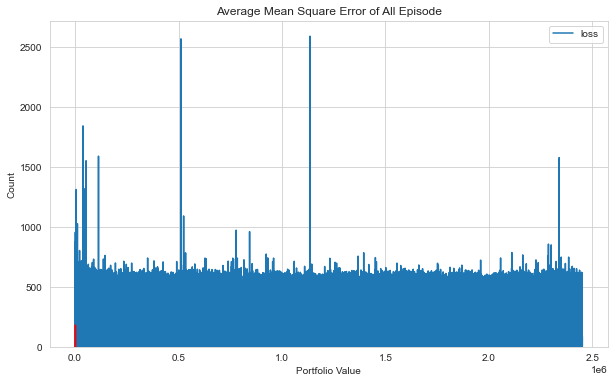

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

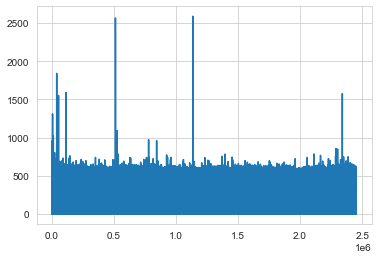

In [5]:
plt.plot(agent.model.losses)

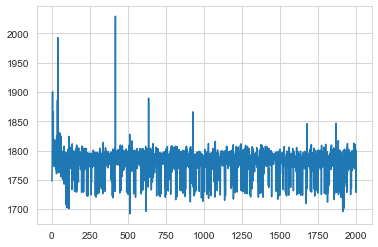

In [6]:
plt.plot(portfolio_value)

episode end value: 1135.30, duration: 0:00:00.111037
Sell: 297 times, Buy: 284 times


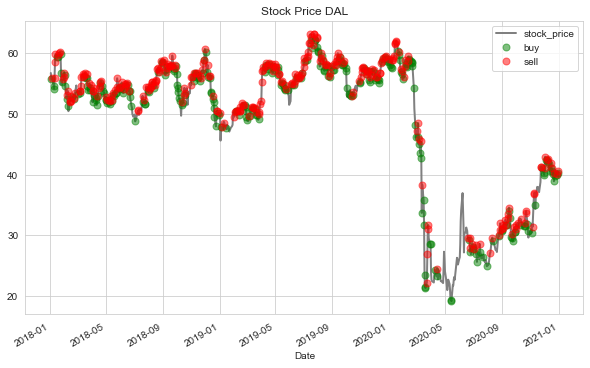

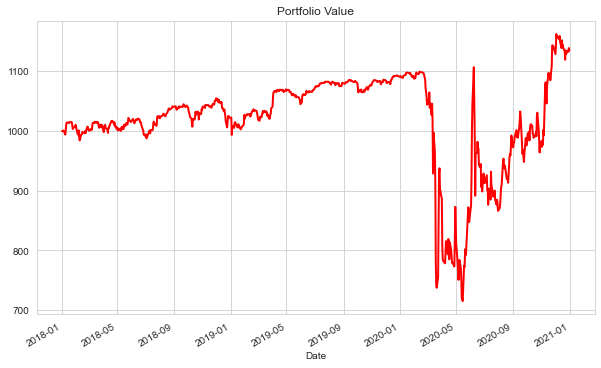

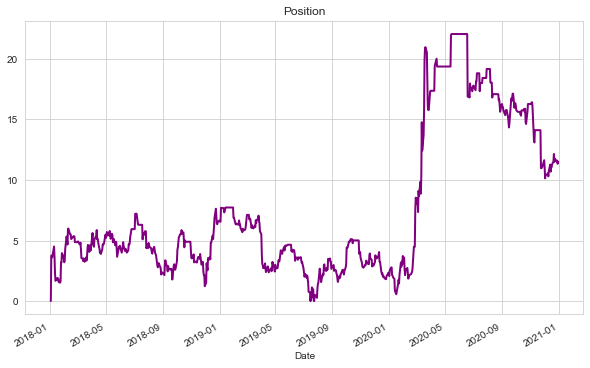

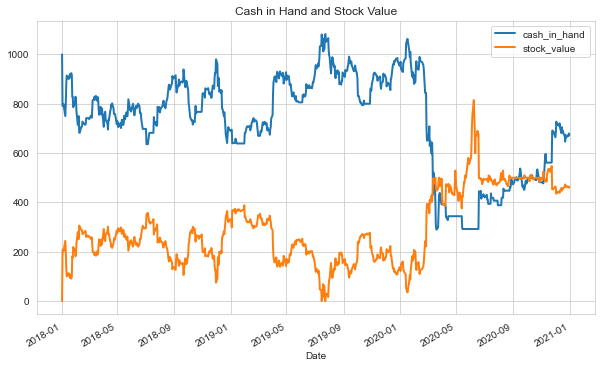

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DAL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.32 %
Volatility: 0.2621
shape ratio: 0.1229
Maximun drawdown: -34.97 %
Calmar ratio: 0.1235
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -10.84 %
Volatility (benchmark): 0.5100
shape ratio: -0.2342
Maximun drawdown: -69.62 %
Calmar ratio (benchmark): -0.1558


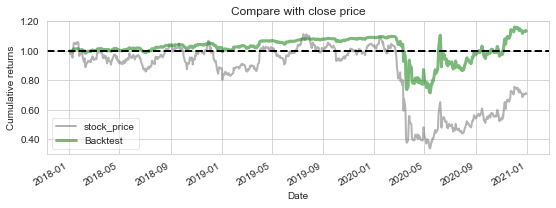

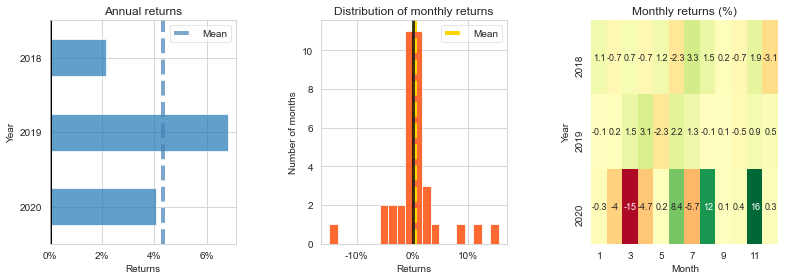

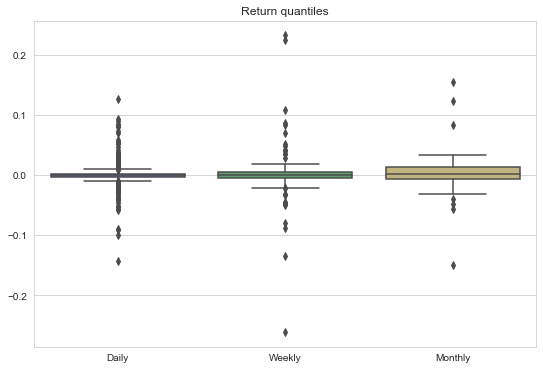

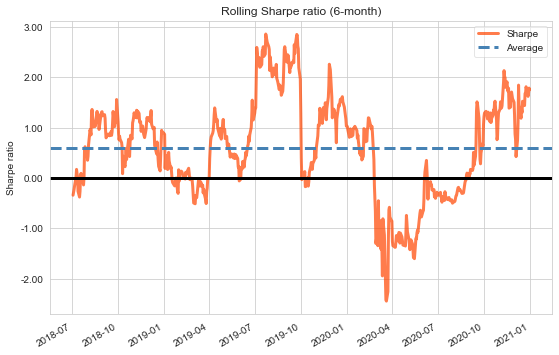

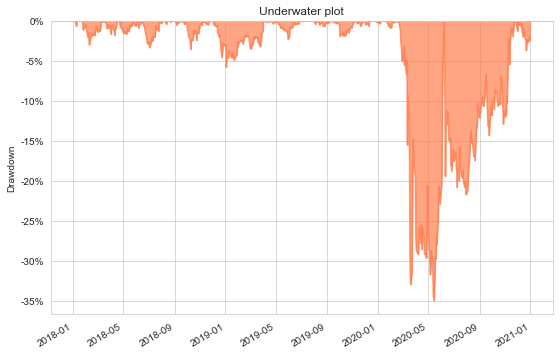

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')